## Import Libraries

In this notebook I have created a model which recognize hand weitten digits.




In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Load Dataset
For this project I have used MNIST dataset



In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


# Normalization of Input Data


In [3]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [4]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Data Visualization


In [5]:
def display_some_example(examples, labels):
    plt.figure(figsize=(10, 10))

    for i in range(25):
        index = np.random.randint(0, examples.shape[0]-1)
        img = examples[index]
        label = labels[index]

        plt.subplot(5, 5, i+1)
        plt.title(str(label))
        plt.tight_layout()
        plt.imshow(img, cmap='gray')
    plt.show()

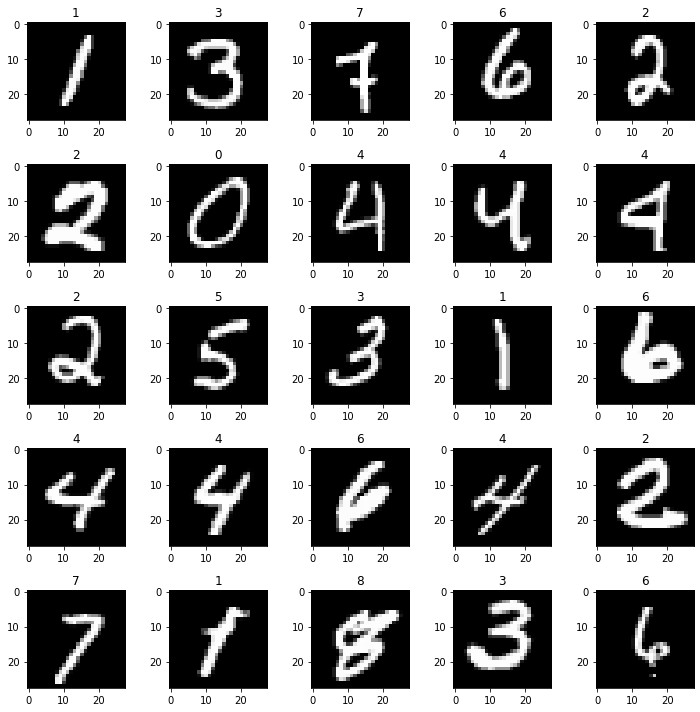

In [6]:
display_some_example(X_train,y_train)


# Model


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.GlobalAvgPool2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(X_train, y_train, batch_size=64, epochs=3, validation_split=0.2)
model.evaluate(X_test, y_test, batch_size=64)

Epoch 1/3
750/750 [==============================] - 52s 69ms/step - loss: 0.2294 - accuracy: 0.9371 - val_loss: 0.1056 - val_accuracy: 0.9682
Epoch 2/3
750/750 [==============================] - 55s 73ms/step - loss: 0.0541 - accuracy: 0.9832 - val_loss: 0.0571 - val_accuracy: 0.9841
Epoch 3/3
157/157 [==============================] - 2s 15ms/step - loss: 0.0615 - accuracy: 0.9798


[0.061450324952602386, 0.9797999858856201]

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0

In [18]:
print("Final test accuracy of the model: "),model.evaluate(X_test,y_test,batch_size=64)[1]

Final test accuracy of the model: 
157/157 [==============================] - 2s 13ms/step - loss: 0.0615 - accuracy: 0.9798


(None, 0.9797999858856201)